In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [ ]:
df_test=pd.read_csv('test.csv')
df_train=pd.read_csv('train.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.drop(['PassengerId', 'Name','Ticket','Fare','Embarked'],axis=1,inplace=True)

In [ ]:
df_train.loc[df_train['Sex']=='male','Sex']=1
df_train.loc[df_train['Sex']=='female','Sex']=0

In [ ]:
df_train['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

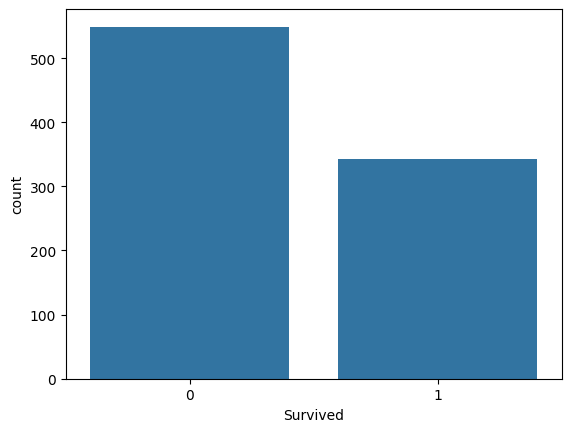

In [ ]:
sns.countplot(data=df_train,x='Survived')

In [ ]:
df_train.corr(numeric_only=True)['Survived'].sort_values()

,Survived
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Survived,1.000000


<Axes: >

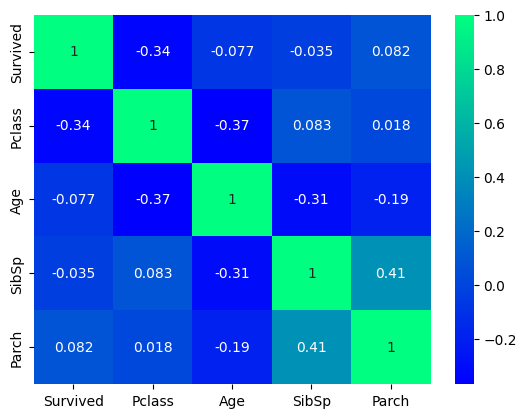

In [ ]:
sns.heatmap(df_train.corr(numeric_only=True),annot=True,cmap='winter')

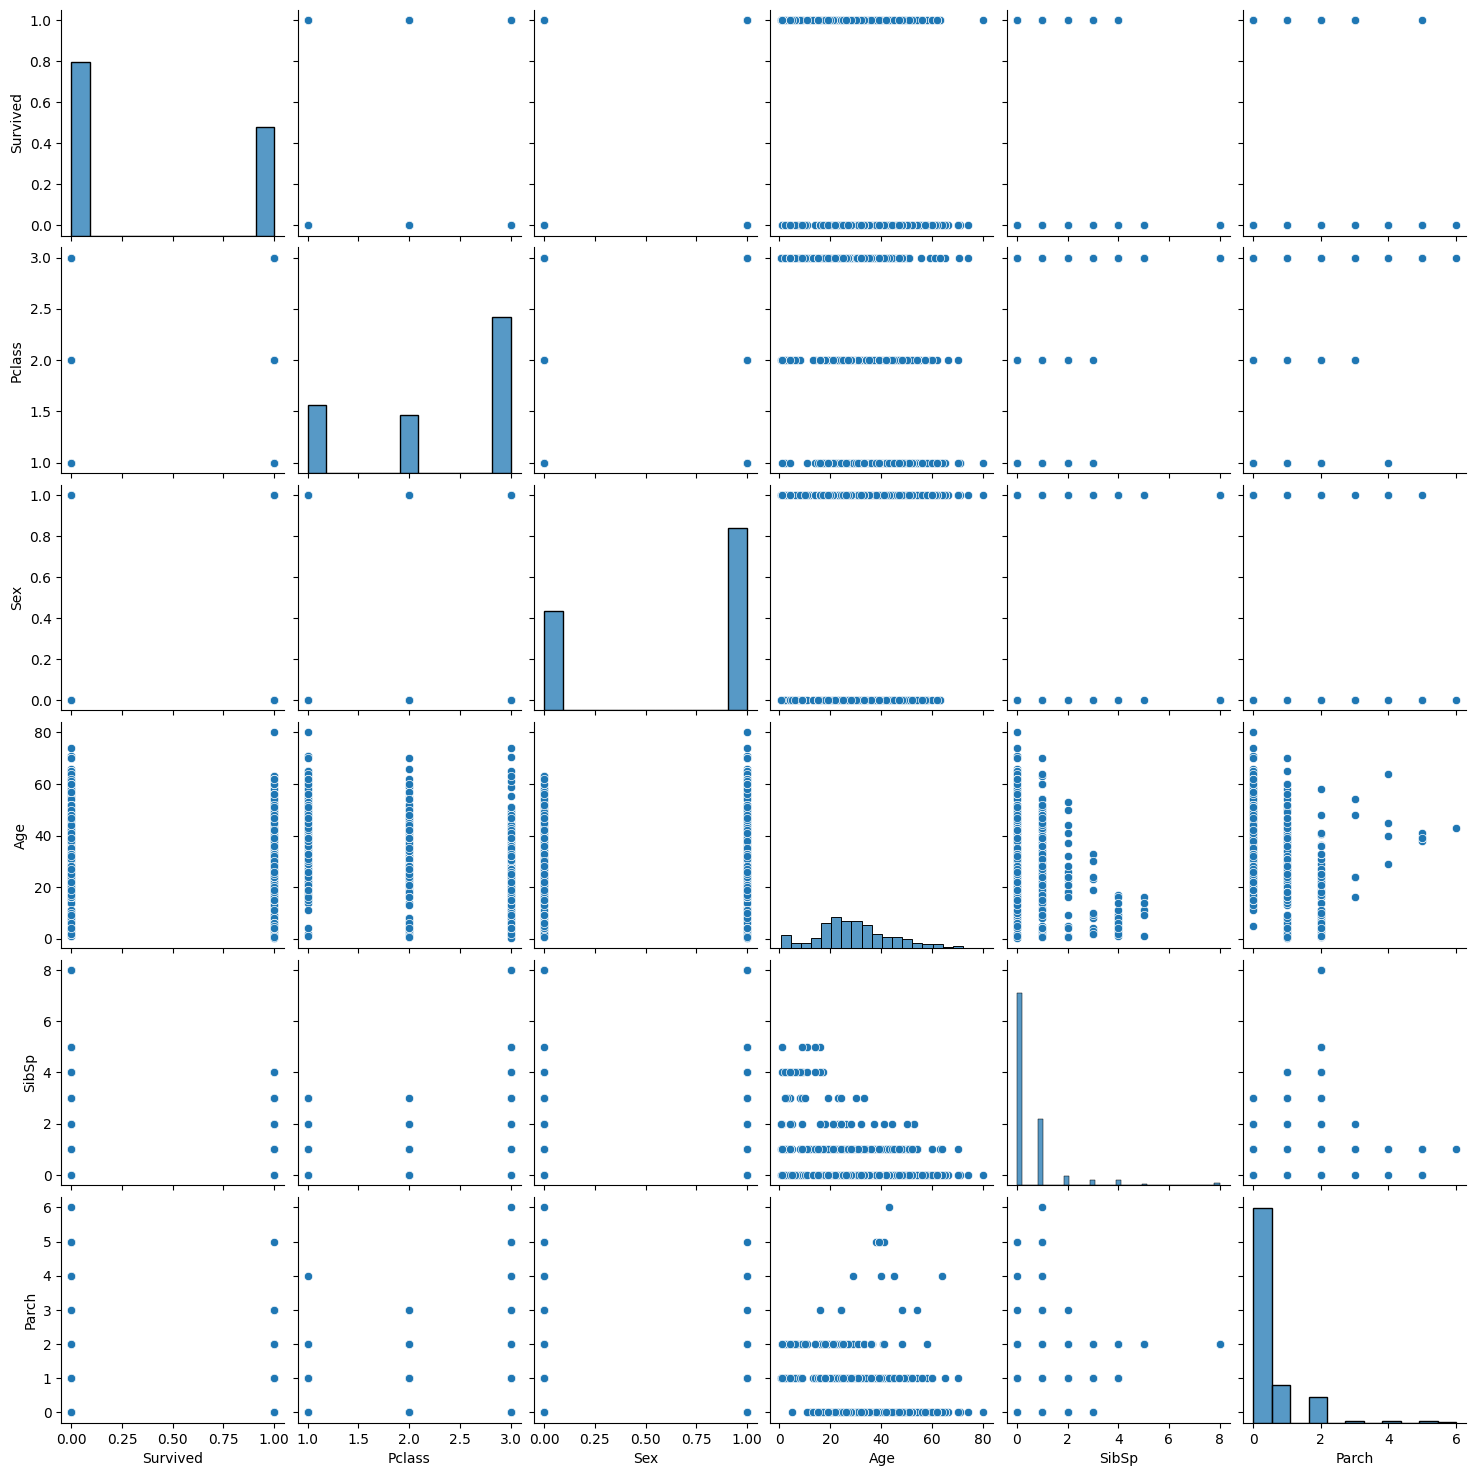

In [ ]:
sns.pairplot(data=df_train)

In [ ]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Cabin,687


In [ ]:
100*(df_train.isnull().sum()/len(df_train))

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Cabin,77.104377


In [ ]:
def missing_percent(df):
  nan_percent=100*(df.isnull().sum()/len(df))
  nan_percent=nan_percent[nan_percent>0].sort_values()
  return nan_percent

In [ ]:
nan_percent=missing_percent(df_train)


([0, 1], [Text(0, 0, 'Age'), Text(1, 0, 'Cabin')])

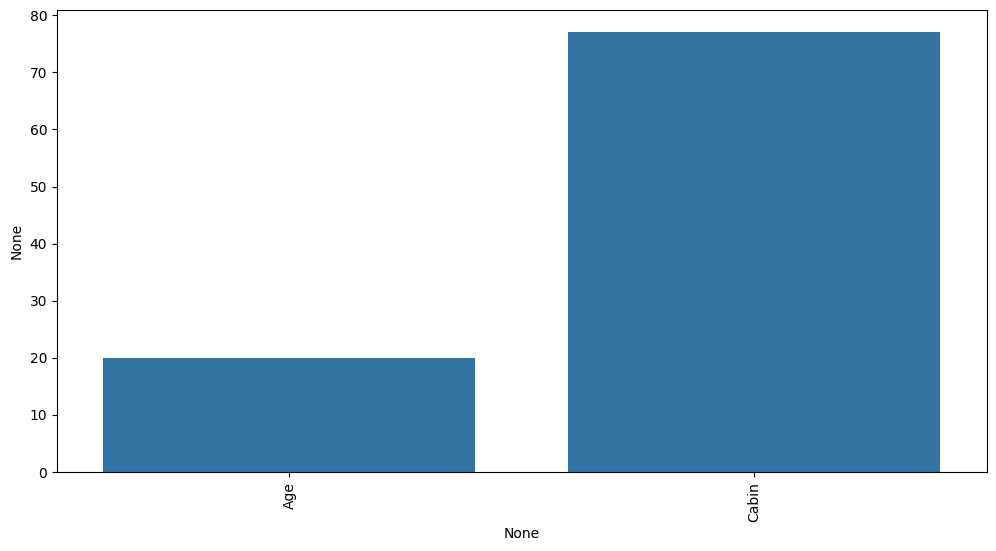

In [ ]:
nan_percent=missing_percent(df_train)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [ ]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Cabin,687


([0], [Text(0, 0, 'Cabin')])

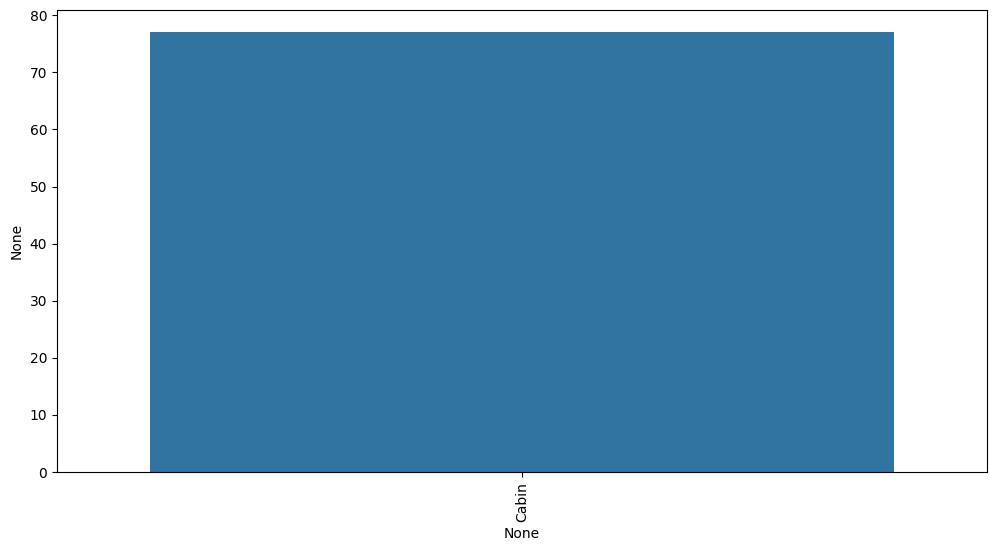

In [ ]:
nan_percent=missing_percent(df_train)
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index,y=nan_percent)
plt.xticks(rotation=90)

In [ ]:
df_train=df_train.drop(['Cabin'],axis=1)

In [ ]:
nan_percent=missing_percent(df_train)

In [ ]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [ ]:
df_train['Survived']=df_train['Survived'].apply(str)
df_train['Pclass']=df_train['Pclass'].apply(str)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [ ]:
df_train_num=df_train.select_dtypes(exclude='object')



In [ ]:

df_train_cat=df_train.select_dtypes(include='object')

In [ ]:
df_train_cat.drop('Survived',axis=1,inplace=True)

NameError: name 'df_train_obj' is not defined

In [ ]:

final_train_df=pd.concat([df_train_num,df_train_obj,df_train['Survived']],axis=1)
final_train_df.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit

NameError: name 'final_train_df' is not defined